In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
csv = pd.read_csv('./kankyou.csv')

In [10]:
csv.columns

Index(['都道府県コード', '都道府県', '市区町村コード', '市区町村', '製造業', '建設業・鉱業', '農林水産業',
       '産業部門　小計', '業務', '家庭', '民生部門　小計', '旅客自動車', '貨物自動車', '鉄道', '船舶',
       '運輸部門　小計', '一般廃棄物', '排出量合計'],
      dtype='object')

In [11]:
csv['都道府県'].describe()

count     1741
unique      47
top        北海道
freq       179
Name: 都道府県, dtype: object

In [12]:
csv['排出量合計'].describe()

count     1741
unique     770
top        28 
freq        13
Name: 排出量合計, dtype: object

ValueError: could not convert string to float: '12,404 '

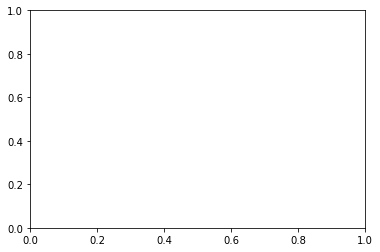

In [13]:
# sns.distplot(csv['排出量合計']);
csv['排出量合計']

In [16]:
csv['排出量合計'] = csv['排出量合計'].str.replace(',', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [18]:
for column in csv['排出量合計']:
    print(type(column))
    print(column)

<class 'float'>
12404.0
<class 'float'>
2123.0
<class 'float'>
1045.0
<class 'float'>
2423.0
<class 'float'>
1246.0
<class 'float'>
1617.0
<class 'float'>
1395.0
<class 'float'>
921.0
<class 'float'>
55.0
<class 'float'>
682.0
<class 'float'>
370.0
<class 'float'>
153.0
<class 'float'>
3454.0
<class 'float'>
378.0
<class 'float'>
159.0
<class 'float'>
115.0
<class 'float'>
795.0
<class 'float'>
100.0
<class 'float'>
301.0
<class 'float'>
165.0
<class 'float'>
228.0
<class 'float'>
77.0
<class 'float'>
281.0
<class 'float'>
1133.0
<class 'float'>
259.0
<class 'float'>
155.0
<class 'float'>
17.0
<class 'float'>
157.0
<class 'float'>
171.0
<class 'float'>
284.0
<class 'float'>
674.0
<class 'float'>
250.0
<class 'float'>
512.0
<class 'float'>
679.0
<class 'float'>
410.0
<class 'float'>
168.0
<class 'float'>
26.0
<class 'float'>
54.0
<class 'float'>
28.0
<class 'float'>
36.0
<class 'float'>
28.0
<class 'float'>
198.0
<class 'float'>
42.0
<class 'float'>
188.0
<class 'float'>
170.0
<class 'f

364.0
<class 'float'>
286.0
<class 'float'>
260.0
<class 'float'>
865.0
<class 'float'>
1021.0
<class 'float'>
105.0
<class 'float'>
163.0
<class 'float'>
330.0
<class 'float'>
535.0
<class 'float'>
99.0
<class 'float'>
427.0
<class 'float'>
96.0
<class 'float'>
364.0
<class 'float'>
127.0
<class 'float'>
116.0
<class 'float'>
112.0
<class 'float'>
82.0
<class 'float'>
1304.0
<class 'float'>
230.0
<class 'float'>
466.0
<class 'float'>
288.0
<class 'float'>
499.0
<class 'float'>
219.0
<class 'float'>
166.0
<class 'float'>
120.0
<class 'float'>
346.0
<class 'float'>
230.0
<class 'float'>
148.0
<class 'float'>
121.0
<class 'float'>
24.0
<class 'float'>
57.0
<class 'float'>
65.0
<class 'float'>
81.0
<class 'float'>
33.0
<class 'float'>
62.0
<class 'float'>
24.0
<class 'float'>
136.0
<class 'float'>
9.0
<class 'float'>
10.0
<class 'float'>
27.0
<class 'float'>
21.0
<class 'float'>
66.0
<class 'float'>
78.0
<class 'float'>
107.0
<class 'float'>
62.0
<class 'float'>
36.0
<class 'float'>
77.0


In [20]:
csv['排出量合計'].describe()

count     1741.000000
mean       535.577829
std       1305.572603
min          2.000000
25%         60.000000
50%        178.000000
75%        460.000000
max      18432.000000
Name: 排出量合計, dtype: float64

<AxesSubplot:xlabel='排出量合計', ylabel='Density'>

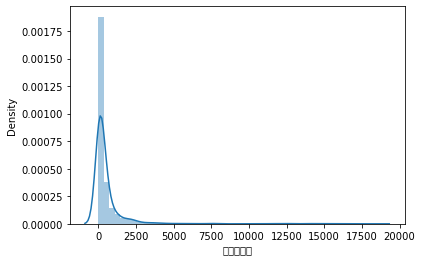

In [21]:
sns.distplot(csv['排出量合計'])

In [22]:
print("Skewness: %f" % csv['排出量合計'].skew())
print("Kurtosis: %f" % csv['排出量合計'].kurt())

Skewness: 7.293917
Kurtosis: 68.651023


In [24]:
hokkaido_data = csv[csv['都道府県'] == '北海道']

In [30]:
total_emissions = hokkaido_data['排出量合計'].astype(int).sum()

In [31]:
print(total_emissions)

45729


In [35]:
# 都道府県ごとに排出量を計算します
prefecture_emissions = csv.groupby('都道府県')['排出量合計'].sum().reset_index()

# 都道府県ごとの排出量を降順でソートします
sorted_emissions = prefecture_emissions.sort_values(by='排出量合計', ascending=False)

# 順番に出力します
for rank, (index, row) in enumerate(sorted_emissions.iterrows(), start=1):
    print(f'{rank}: {row["都道府県"]} {row["排出量合計"]}')

1: 東京都 60937.0
2: 愛知県 60637.0
3: 千葉県 59600.0
4: 神奈川県 55049.0
5: 北海道 45729.0
6: 兵庫県 45279.0
7: 大阪府 41441.0
8: 広島県 39465.0
9: 福岡県 36156.0
10: 岡山県 34800.0
11: 埼玉県 33192.0
12: 茨城県 32796.0
13: 大分県 24923.0
14: 山口県 24711.0
15: 静岡県 23649.0
16: 三重県 20210.0
17: 新潟県 16898.0
18: 愛媛県 16643.0
19: 宮城県 15446.0
20: 栃木県 13797.0
21: 岐阜県 13511.0
22: 福島県 13216.0
23: 群馬県 12963.0
24: 長野県 12860.0
25: 京都府 11984.0
26: 和歌山県 11863.0
27: 青森県 11078.0
28: 熊本県 9979.0
29: 鹿児島県 9648.0
30: 岩手県 9617.0
31: 滋賀県 8962.0
32: 沖縄県 8884.0
33: 富山県 8869.0
34: 香川県 8789.0
35: 宮崎県 7741.0
36: 石川県 7521.0
37: 秋田県 7174.0
38: 山形県 7003.0
39: 長崎県 6982.0
40: 福井県 6420.0
41: 徳島県 5956.0
42: 高知県 5714.0
43: 島根県 5395.0
44: 奈良県 5205.0
45: 佐賀県 5116.0
46: 山梨県 5052.0
47: 鳥取県 3581.0


In [36]:
# 連番を含めた結果をCSVファイルとしてエクスポートします
sorted_emissions.to_csv('排出量ランキング.csv', index=False, encoding='utf-8')

<AxesSubplot:xlabel='排出量合計', ylabel='Density'>

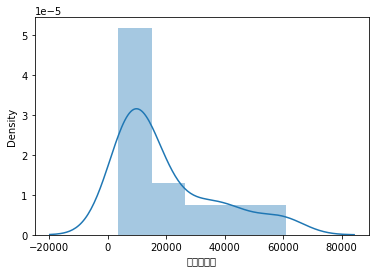

In [38]:
sns.distplot(sorted_emissions["排出量合計"])

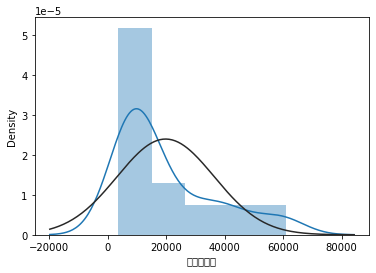

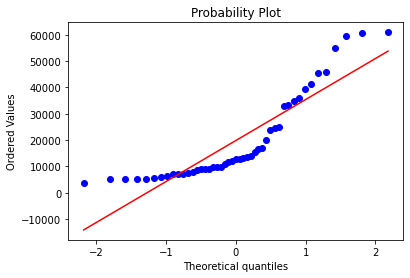

In [39]:
sns.distplot(sorted_emissions["排出量合計"], fit=norm);
fig = plt.figure()
res = stats.probplot(sorted_emissions["排出量合計"], plot=plt)

In [41]:
pd.get_dummies(sorted_emissions["排出量合計"])

,3581.0,5052.0,5116.0,5205.0,5395.0,5714.0,5956.0,6420.0,6982.0,7003.0,...,34800.0,36156.0,39465.0,41441.0,45279.0,45729.0,55049.0,59600.0,60637.0,60937.0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
